In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

## Лабораторная работа №4: Классификация. Деревья решений

[Лекция](../lectures/lecture_4/lecture_4.ipynb)

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.
2. Датасет и подготовка данных:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Разбить выборку на обучающую и тестовую.
     > Далее используем обучающую выборку, в том числе для метрик.
3. Дерево решений:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `DecisionTreeClassifier` (как минимум `max_depth`, `max_features`, другие параметры - по желанию.)
   - Вывести значения гиперпараметра и метрик для наилучшей модели `DecisionTreeClassifier` ($accuracy$, $precision$, $recall$, $\textit{f-measure}$).
   - Для полученного наилучшего дерева вывести `feature_importances`, отсортировать их по убыванию.
   - Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели.
   - Сравнить метрики до и после фильтрации признаков лучших моделей.
4. Случайный лес
   - Построить случайный лес (`RandomForestClassifier`), c использованием `GridSearchCV` осуществить подбор гиперпараметра.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Осуществить фильтрацию признаков.
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Сравнить метрики до и после фильтрации признаков лучших моделей.
5. Метод ближайших соседей:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`).
   - Вывести значения гиперпараметра и метрик для наилучшей модели.
   - Осуществить фильтрацию признаков.
   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.
   - Вывести полученные гиперпараметры лучшей модели случайного леса.
   - Сравнить метрики до и после фильтрации признаков.
6. Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств &ndash; не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков. Иначе &ndash; пропустить этот пункт.
7. Оценка качества построенных моделей:
   - Визуализировать любое полученное дерево решений.
     > Для вывода названий признаков в граф необходимо задать значение аргумента `feature_names` в `sklearn.tree.export_graphviz`, для вывода названий классов &ndash; `class_names` (перед кодированием целевого признака можно сохранить названия в отдельный массив).
   - Сравнить лучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` на **тестовой выборке**. Привести значения метрик $accuracy$, $precision$, $recall$, $\textit{f-measure}$.

https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data
## Описание датасета

Эти данные связаны с кампаниями прямого маркетинга португальского банковского учреждения. Маркетинговые кампании были основаны на телефонных звонках. Часто требуется более одного контакта с одним и тем же клиентом, чтобы узнать, будет ли продукт (банковский срочный депозит) подписан ("да") или нет ("нет"). 

- age		$\;\;\;\;\;\;$	Возраст.
- job		$\;\;\;\;\;\;$	Профессия: 
   - 'admin.',
   - 'blue-collar',
   - 'entrepreneur',
   - 'housemaid',
   - 'management',
   - 'retired',
   - 'self-employed',
   - 'services',
   - 'student',
   - 'technician',
   - 'unemployed',
   - 'unknown'.
- marital	$\;\;\;\;\;\;$	Cемейное положение:
   - 'divorced',
   - 'married',
   - 'single',
   - 'unknown'.
   - *`note: 'divorced' means divorced or widowed`*
- education	$\;\;\;\;\;\;$	Степень образования:
   - 'basic.4y',
   - 'basic.6y',
   - 'basic.9y',
   - 'high.school',
   - 'illiterate',
   - 'professional.course',
   - 'university.degree',
   - 'unknown'.
- default		$\;\;\;\;\;\;$	Имеет просроченный кредит?
- balance		$\;\;\;\;\;\;$	Среднегодовой баланс в евро.	
- housing	$\;\;\;\;\;\;$		Имеет жилищный кредит?		
- loan		$\;\;\;\;\;\;$	Имеет личный заем?		
- contact	$\;\;\;\;\;\;$		тип связи с клиентом:
    - 'cellular',
    - 'telephone'.
- day_of_week		$\;\;\;\;\;\;$	Последний день недели, в который произошел контакт с клиентом.
- month	Feature	Date	$\;\;\;\;\;\;$	Последний месяц года, в который произошел контакт с клиентом: 
    - 'jan', 
    - 'feb',
    - 'mar', 
    - ..., 
    - 'nov',
    - 'dec'.
- duration	$\;\;\;\;\;\;$		Продолжительность последнего контакта, в секундах. *`Важное примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y='no'). Однако длительность неизвестна до выполнения вызова. Кроме того, очевидно, что известно время после завершения вызова. Таким образом, эти исходные данные следует включать только для целей сравнения и от них следует отказаться, если цель состоит в том, чтобы получить реалистичную прогностическую модель.`*
- campaign		$\;\;\;\;\;\;$		Количество контактов, осуществленных в ходе данной кампании и для данного клиента. 
- pdays		$\;\;\;\;\;\;$	Количество дней, прошедших с момента последнего контакта с клиентом в рамках предыдущей кампании. *`-1 означает, что с клиентом ранее не связывались.`*
- previous	$\;\;\;\;\;\;$		Количество контактов, совершенных до начала данной кампании и для данного клиента.
- poutcome	$\;\;\;\;\;\;$		итоги предыдущей маркетинговой кампании
    - 'failure',
    - 'nonexistent',
    - 'success'.
- y	$\;\;\;\;\;\;$ Целевая переменная. Оформил ли клиент срочный депозит?

Загрузим датасет

In [118]:
df = pd.read_csv("bank.csv" , sep=";")

Посмотрим на информацию о типах данных

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Посмотрим на описательные статистики

In [120]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Посмотрим на распределение классов

In [122]:
df.value_counts('y')

y
no     4000
yes     521
Name: count, dtype: int64

Существует дисбаланс классов. Вероятно при классификации модель будет плохо определять класс yes.

Закодируем категориальные переменные

In [124]:
le = LabelEncoder()

categorical = ["job", "marital", "education", "contact", "poutcome"]

df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['y'] = le.fit_transform(df['y'])

df = pd.get_dummies(data = df, prefix = categorical, columns = categorical)

df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,oct,79,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,33,0,4789,1,1,11,may,220,1,339,...,True,False,False,True,False,False,True,False,False,False
2,35,0,1350,1,0,16,apr,185,1,330,...,False,True,False,True,False,False,True,False,False,False
3,30,0,1476,1,1,3,jun,199,4,-1,...,False,True,False,False,False,True,False,False,False,True
4,59,0,0,1,0,5,may,226,1,-1,...,True,False,False,False,False,True,False,False,False,True


Выделим данные для обучения

In [125]:
X = df.drop(["day", "month", "y"], axis=1)
y = df["y"].copy()

Нормализуем и разделим данные на тестовые и тренировочные

In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

Создадим модель и с помощью GridSearch осуществим подбор гиперпараметров max_features, max_depth.

In [127]:
clf = DecisionTreeClassifier(random_state=0)

param_grid_tree = {
    'max_features': [5, 10, 15, 20, 25, 30, 35],
    'max_depth': [2, 4, 8, 16, 32, 64, None],
}

grid_search_tree = GridSearchCV(estimator=clf, param_grid=param_grid_tree, cv=5, scoring='accuracy')

grid_search_tree.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search_tree.best_params_}"
      f"\nBest CV accuracy: {grid_search_tree.best_score_}"
      f"\nTest accuracy: {grid_search_tree.score(X_test, y_test)}\n")

best_clf_tree = grid_search_tree.best_estimator_

preds = best_clf_tree.predict(X_test)
print(classification_report(y_test, preds))


Best parameters: {'max_depth': 4, 'max_features': 20}
Best CV accuracy: 0.9020247165396846
Test accuracy: 0.8960943257184967

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1190
           1       0.64      0.36      0.46       167

    accuracy                           0.90      1357
   macro avg       0.78      0.67      0.70      1357
weighted avg       0.88      0.90      0.88      1357



Как можно заметить, класс 0 модель довольно точно определяет, а класс 1 наоборот. Как и было замечено ранее это происходит из-за дисбаланса классов в данных.

Выведем важность признаков и отберем только те, важность которых превышает 0.02.

In [128]:
importances_tree = pd.Series(best_clf_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances_tree)

selected_features_tree = importances_tree[importances_tree > 0.02].index

print(f"\nFeatures: {selected_features_tree}")

duration               0.615463
poutcome_success       0.213185
pdays                  0.092609
age                    0.053387
contact_unknown        0.021815
job_retired            0.003541
education_secondary    0.000000
marital_divorced       0.000000
marital_married        0.000000
marital_single         0.000000
education_primary      0.000000
contact_cellular       0.000000
education_tertiary     0.000000
education_unknown      0.000000
job_unemployed         0.000000
contact_telephone      0.000000
poutcome_failure       0.000000
poutcome_other         0.000000
job_unknown            0.000000
job_student            0.000000
job_technician         0.000000
default                0.000000
job_services           0.000000
job_self-employed      0.000000
job_management         0.000000
job_housemaid          0.000000
job_entrepreneur       0.000000
job_blue-collar        0.000000
job_admin.             0.000000
previous               0.000000
campaign               0.000000
loan    

In [129]:
X_filtered = df[selected_features_tree].copy()

scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered_scaled, y, test_size=0.3, random_state=0)

In [130]:
clf = DecisionTreeClassifier(random_state=0)

grid_search_tree = GridSearchCV(estimator=clf, param_grid=param_grid_tree, cv=5, scoring='accuracy')

grid_search_tree.fit(X_train_filtered, y_train)

print(f"\nBest parameters: {grid_search_tree.best_params_}"
      f"\nBest CV accuracy: {grid_search_tree.best_score_}"
      f"\nTest accuracy: {grid_search_tree.score(X_test_filtered, y_test)}\n")

best_clf_tree = grid_search_tree.best_estimator_

preds = best_clf_tree.predict(X_test_filtered)
print(classification_report(y_test, preds))


Best parameters: {'max_depth': 4, 'max_features': 5}
Best CV accuracy: 0.9004459375687404
Test accuracy: 0.8997789240972734

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1190
           1       0.66      0.39      0.49       167

    accuracy                           0.90      1357
   macro avg       0.79      0.68      0.72      1357
weighted avg       0.89      0.90      0.89      1357



После фильтрации признаков метрики немного улучшились.

### Random Forest

In [156]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

Создадим модель и с помощью GridSearch осуществим подбор гиперпараметров max_features, max_depth, n_estimators

In [158]:
param_grid_forest = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': [5, 10, 15, 20, 25, 30, 35]
}

clf = RandomForestClassifier(random_state=0)
grid_search_forest = GridSearchCV(clf, param_grid_forest, cv=5, scoring='accuracy')
grid_search_forest.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search_forest.best_params_}"
      f"\nBest CV accuracy: {grid_search_forest.best_score_}"
      f"\nTest accuracy: {grid_search_forest.score(X_test, y_test)}\n")

best_clf_forest = grid_search_forest.best_estimator_

preds = best_clf_forest.predict(X_test)
print(classification_report(y_test, preds))


Best parameters: {'max_depth': 25, 'max_features': 15, 'n_estimators': 30}
Best CV accuracy: 0.9032880396744455
Test accuracy: 0.8968312453942521

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1190
           1       0.63      0.40      0.49       167

    accuracy                           0.90      1357
   macro avg       0.77      0.68      0.72      1357
weighted avg       0.88      0.90      0.89      1357



Метрики очень похожи на версию DecisionTree с отфильтрованными признаками.

Выведем важность признаков и отберем только те, важность которых превышает 0.02.

In [161]:
importances_forest = pd.Series(best_clf_forest.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

selected_features_forest = importances[importances > 0.02].index

duration               0.321573
balance                0.132950
age                    0.120672
poutcome_success       0.065599
pdays                  0.058455
campaign               0.043148
previous               0.020767
education_tertiary     0.018296
housing                0.017548
marital_married        0.016532
education_secondary    0.012816
job_blue-collar        0.012164
job_technician         0.012134
contact_cellular       0.011459
job_management         0.010644
contact_unknown        0.010591
loan                   0.009537
job_admin.             0.009197
marital_single         0.009026
education_primary      0.008958
marital_divorced       0.008434
job_retired            0.008214
poutcome_other         0.006363
poutcome_unknown       0.006153
job_entrepreneur       0.006132
job_services           0.005854
poutcome_failure       0.005511
contact_telephone      0.005289
education_unknown      0.005002
job_self-employed      0.004569
job_unknown            0.004512
job_unem

In [162]:
X_filtered = df[selected_features_forest].copy()

scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered_scaled, y, test_size=0.3, random_state=0)

In [164]:
param_grid_forest = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [5, 10, 15, 20, 25],
    'max_features': [1, 3, 5, 7]
}

clf = RandomForestClassifier(random_state=0)

grid_search_forest_opt = GridSearchCV(clf, param_grid_forest, cv=5, scoring='accuracy')
grid_search_forest_opt.fit(X_train_filtered, y_train)

print(f"\nBest parameters: {grid_search_forest_opt.best_params_}"
      f"\nBest CV accuracy: {grid_search_forest_opt.best_score_}"
      f"\nTest accuracy: {grid_search_forest_opt.score(X_test_filtered, y_test)}\n")

best_clf_forest = grid_search_forest_opt.best_estimator_

preds = best_clf_forest.predict(X_test_filtered)
print(classification_report(y_test, preds))


Best parameters: {'max_depth': 5, 'max_features': 5, 'n_estimators': 20}
Best CV accuracy: 0.9001284820125184
Test accuracy: 0.887988209285188

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.59      0.31      0.40       167

    accuracy                           0.89      1357
   macro avg       0.75      0.64      0.67      1357
weighted avg       0.87      0.89      0.87      1357



После отбора признаков метрики немного ухудшились.

### KNN

In [138]:
param_grid_knn = {'n_neighbors': list(range(1, 30))}

clf = KNeighborsClassifier()

grid_search_knn = GridSearchCV(clf, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search_knn.best_params_}"
      f"\nBest CV accuracy: {grid_search_knn.best_score_}"
      f"\nTest accuracy: {grid_search_knn.score(X_test, y_test)}\n")

best_clf_knn = grid_search_knn.best_estimator_

preds = best_clf_knn.predict(X_test)
print(classification_report(y_test, preds))


Best parameters: {'n_neighbors': 27}
Best CV accuracy: 0.8953866458695783
Test accuracy: 0.8850405305821666

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.67      0.13      0.22       167

    accuracy                           0.89      1357
   macro avg       0.78      0.56      0.58      1357
weighted avg       0.86      0.89      0.85      1357



Данная модель хуже всех определяет класс 1. Общая картина метрик очень похожа на последнюю модель

In [139]:
X_filtered = df[selected_features_tree].copy()

scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered_scaled, y, test_size=0.3, random_state=0)

In [140]:
clf = KNeighborsClassifier()

grid_search_knn = GridSearchCV(clf, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_filtered, y_train)

print(f"\nBest parameters: {grid_search_knn.best_params_}"
      f"\nBest CV accuracy: {grid_search_knn.best_score_}"
      f"\nTest accuracy: {grid_search_knn.score(X_test_filtered, y_test)}\n")

best_clf_knn = grid_search_knn.best_estimator_

preds = best_clf_knn.predict(X_test_filtered)
print(classification_report(y_test, preds))


Best parameters: {'n_neighbors': 25}
Best CV accuracy: 0.9007623932649429
Test accuracy: 0.8931466470154753

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.61      0.35      0.45       167

    accuracy                           0.89      1357
   macro avg       0.76      0.66      0.69      1357
weighted avg       0.88      0.89      0.88      1357



Метрики значительно улучшились. Модель стала намного лучше определять класс 1.

### Сравнение моделей

Сравним модели на наборе данных, который будет являться пересечением множеств отобранных признаков для каждой из моделей.

In [145]:
features = set(selected_features_tree).intersection(selected_features_forest)

X_opt = df[list(features)].copy()
scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_opt)

X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered_scaled, y, test_size=0.3, random_state=0)

In [146]:
decision_tree = DecisionTreeClassifier(**grid_search_tree.best_params_, random_state=0).fit(X_train_filtered, y_train)
random_forest = RandomForestClassifier(**grid_search_forest.best_params_, random_state=0).fit(X_train_filtered, y_train)
knn = KNeighborsClassifier(**grid_search_knn.best_params_).fit(X_train_filtered, y_train)

Decision Tree
Accuracy: 0.899042004421518
Precision: 0.7753132578819726
Recall: 0.7056433351783827
F1-score: 0.7330998967768241
Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1190
           1       0.62      0.45      0.52       167

    accuracy                           0.90      1357
   macro avg       0.78      0.71      0.73      1357
weighted avg       0.89      0.90      0.89      1357




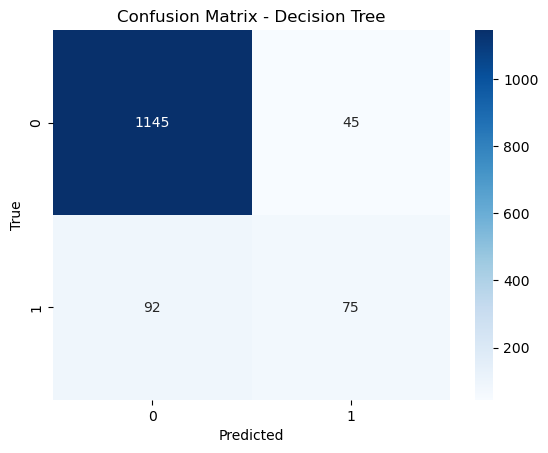

Random Forest
Accuracy: 0.8850405305821666
Precision: 0.7321337108385738
Recall: 0.6642001710863986
F1-score: 0.6893825566381031
Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1190
           1       0.55      0.37      0.44       167

    accuracy                           0.89      1357
   macro avg       0.73      0.66      0.69      1357
weighted avg       0.87      0.89      0.88      1357




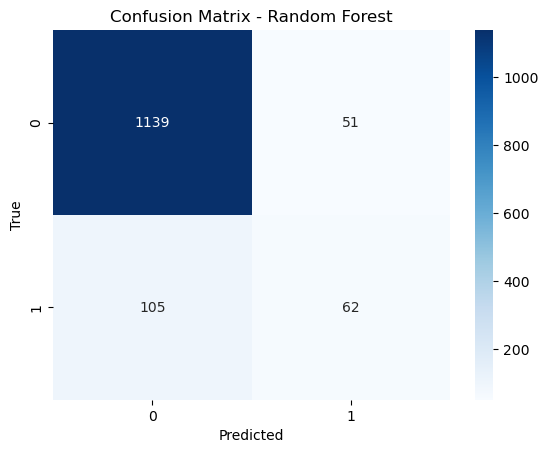

kNN
Accuracy: 0.8953574060427414
Precision: 0.7795042545320015
Recall: 0.652065616665828
F1-score: 0.6894156254432453
Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.65      0.33      0.44       167

    accuracy                           0.90      1357
   macro avg       0.78      0.65      0.69      1357
weighted avg       0.88      0.90      0.88      1357




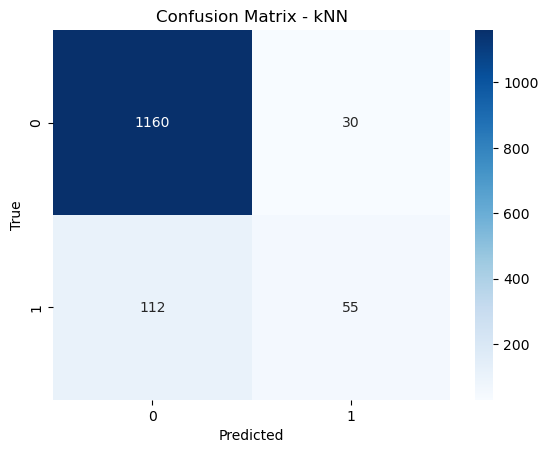

In [150]:
models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "kNN": knn
}

for name, model in models.items():
    preds = model.predict(X_test_filtered)
    print(f"{name}"
          f"\nAccuracy: {accuracy_score(y_test, preds)}"
          f"\nPrecision: {precision_score(y_test, preds, average='macro')}"
          f"\nRecall: {recall_score(y_test, preds, average='macro')}"
          f"\nF1-score: {f1_score(y_test, preds, average='macro')}"
          f"\nReport:\n{classification_report(y_test, preds)}\n")


    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Лучше всего с классификацией справилась модель DecisionTree, она показала наилучшую метрику f1. RandomForest и Knn справились пркатически одинаково.

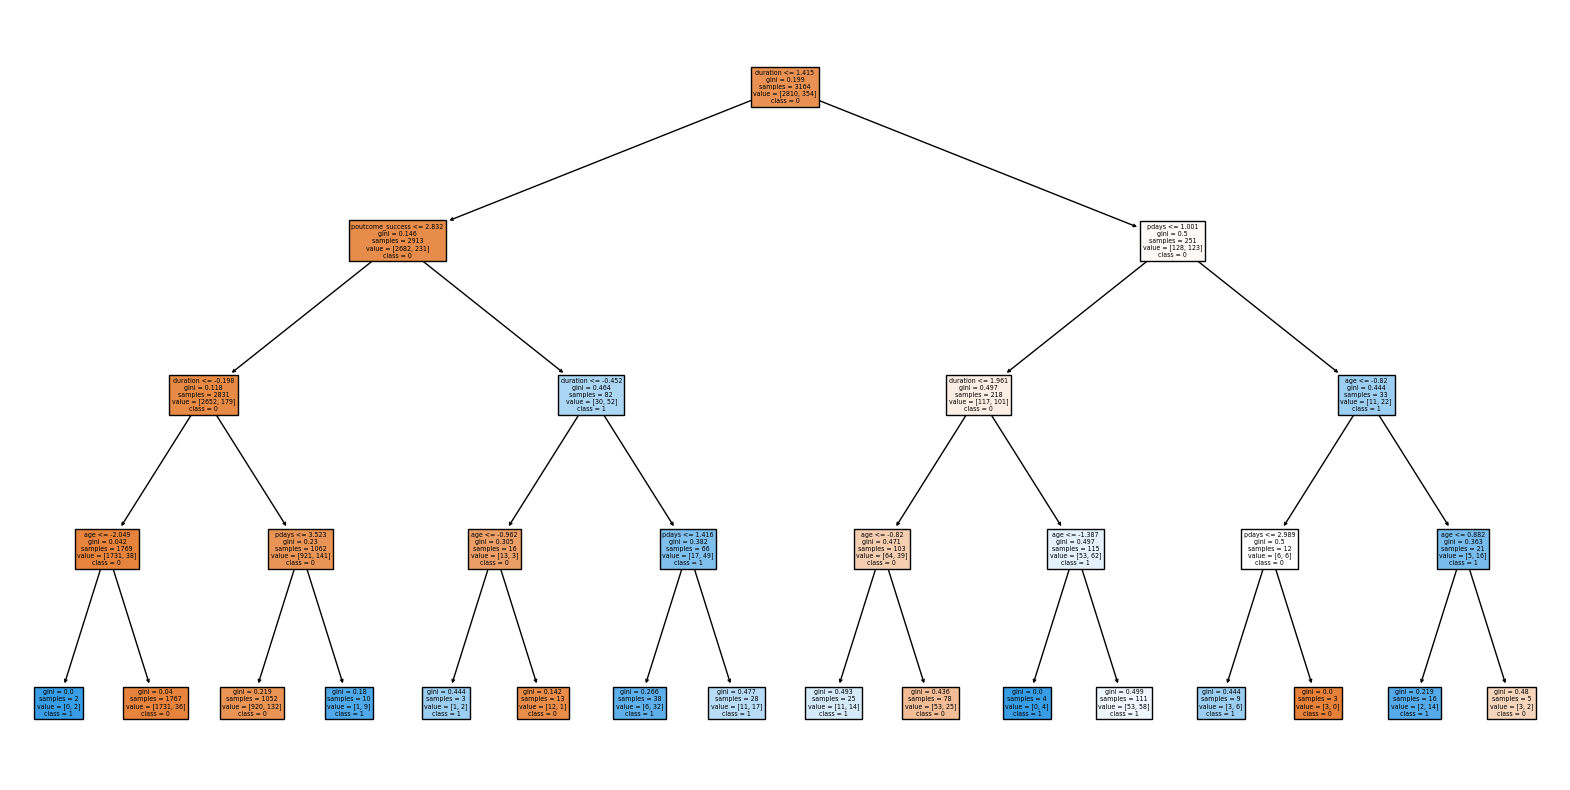

In [155]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X_opt.columns, class_names=['0', '1'], filled=True)
plt.show()